# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [ ]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [29]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [ ]:
# YOUR WORK: Exercise 0
print("Unique Days:", tips['day'].unique())
print("Unique Times:", tips['time'].unique())
print("No. of duplicated rows:", tips.duplicated().sum())
print("Average of total bill:", tips['total_bill'].mean())
print("Average of tips:", tips['tip'].mean())
print(tips['time'].value_counts())

Unique Days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique Times: ['Dinner' 'Lunch']
No. of duplicated rows: 1
Average of total bill: 19.78594262295082
Average of tips: 2.99827868852459
time
Dinner    176
Lunch      68
Name: count, dtype: int64


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
* A) there were a total of 7 columns, and seeing the datatype of sex, day, smoker, time be "object" was interesting as i thought those would be string. Learnt that object is mostly a string but can contain any python objects.
- Is the dataset balanced across `day` and `time`? Cite one count.
* A) The dataset is not balanced across time as it is clear with "Dinner" count being 176 while lunch is just 68.
- One risk if you skip an initial audit here.
* A) Skipping an initial audit like this could hide data quality issues such as duplicates, missing values
### 🔎 Quick checks
- Report the shape (rows, cols).
* A) Shape is 244 rows with 7 columns
- Name 1 non-numeric dtype and why it matters.
* A) day (object). This matters because pandas cannot calculate statistics (mean, median) directly on string columns; we need categorical or numeric encodings for deeper analysis.
### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 1) Import & Core Manipulation (20m)

In [ ]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [ ]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [ ]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [ ]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [32]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [33]:
# YOUR WORK: Exercise 1
filtered = tips.query("day=='Sat' and size>=3")
filtered = filtered.assign(bill_per_person = filtered['total_bill']/filtered['size'])
filtered.sort_values('bill_per_person',ascending=False).head()
#tips.corr(numeric_only=True)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056,0.833,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130,1.557,11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.
-
- A)Looking at the correlation table we know that total_bill and tip_per_person are the most associated with the tip column.
- tips.query("day=='Sat' and size>=3") filters the rows so that only rows containing day as SAT and size more than or equal to 3 appear.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.
- A) filtered.head(3) gives first 3 rows
- bill_per_person formula= total_bill/size

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
-Using .query seems more readable
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [34]:
filtered_with_mask = tips[(tips['day'] == 'Sat') & (tips['size'] >= 3)]
filtered_with_mask.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
19,20.65,3.35,Male,No,Sat,Dinner,3,0.162,1.117
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895
25,17.81,2.34,Male,No,Sat,Dinner,4,0.131,0.585
31,18.35,2.50,Male,No,Sat,Dinner,4,0.136,0.625
33,20.69,2.45,Female,No,Sat,Dinner,4,0.118,0.613


## 2) Cleaning & Preprocessing (15m)

In [47]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
tip_pct,float64
tip_per_person,float64
server_name,object


In [36]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [37]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [49]:
# YOUR WORK: Exercise 2
tips['size'] = tips['size'].astype('int64')
tips_clean = tips[['total_bill','tip','day','time','size']].copy()
print(tips_clean.duplicated().sum())
tips_clean = tips.drop_duplicates()
print(tips_clean.duplicated().sum())

before = tips['server_name'].memory_usage(deep=True)
tips['server_name'] = tips['server_name'].astype('category')
after = tips['server_name'].memory_usage(deep=True)
print("Memory usage (sex) before:", before, "after:", after)


1
0
Memory usage (sex) before: 15020 after: 606


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Casted the size column's dtype to int64. converted the columns sex, smoker, day, and time from object to category dtype as it saves memory
- Did you handle duplicates? How many?
- there was one duplicate, it has been handled using drop_duplicated()
- One naming or string normalization you made.
- used .str.strpi(), .str.title()

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 3) Handling Missing Data (15m)

In [50]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

,0
total_bill,0
tip,21
sex,0
smoker,0
day,0
time,0
size,21
tip_pct,0
tip_per_person,0
server_name,0


In [51]:
dropped = tips_na.dropna(); dropped.shape

(222, 10)

In [54]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
tip_pct,0
tip_per_person,0
server_name,0


In [55]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,21
tip_pct,0
tip_per_person,0
server_name,0


In [ ]:
tips_interp = tips_na.sort_values('total_bill').interpolate(numeric_only=True); tips_interp.isna().sum()

### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [57]:
# YOUR WORK: Exercise 3
tips_fix = tips_na.copy()
mask = tips_fix['tip'].isna() & tips_fix['size'].isna()
tips_fix = tips_fix[~mask]
tips_fix['size'] = tips_fix.groupby('day')['size'].transform(lambda s: s.fillna(round(s.mean())))
tips_fix.isna().sum()

/tmp/ipython-input-1716766028.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_fix['size'] = tips_fix.groupby('day')['size'].transform(lambda s: s.fillna(round(s.mean())))


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
tip_pct,0
tip_per_person,0
server_name,0


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?
- dropna() reduces dataset size but keeps distributions intact, while groupwise fill preserves rows but shifts values toward group averages. The fill assumes missing tip/size follow typical behavior of their day group.Interpolation is suitable when data is continuous and ordered

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 4) Analysis & Visualization (20m)

In [58]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


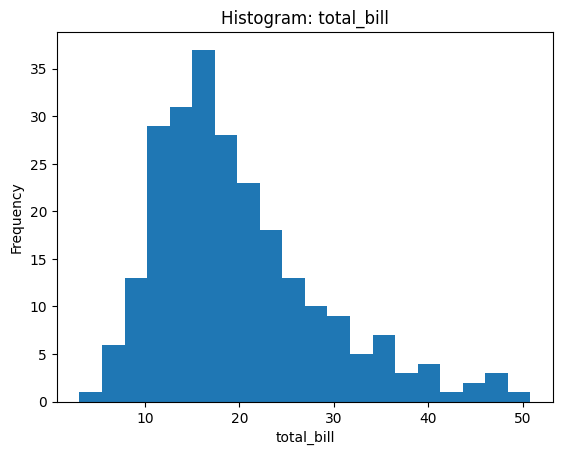

In [59]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


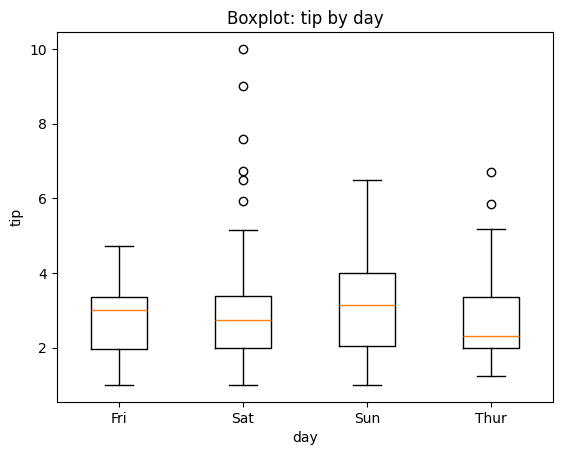

In [60]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

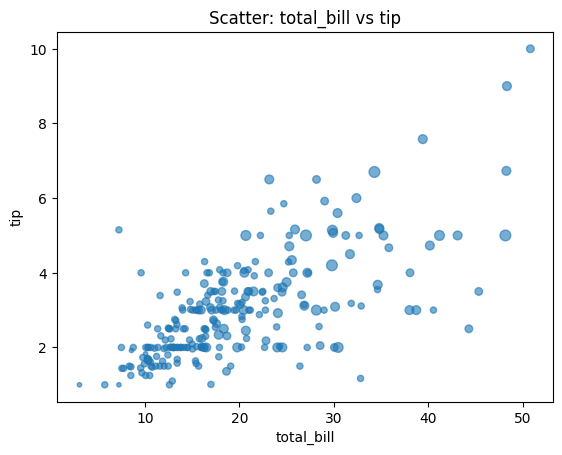

In [61]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

/tmp/ipython-input-3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


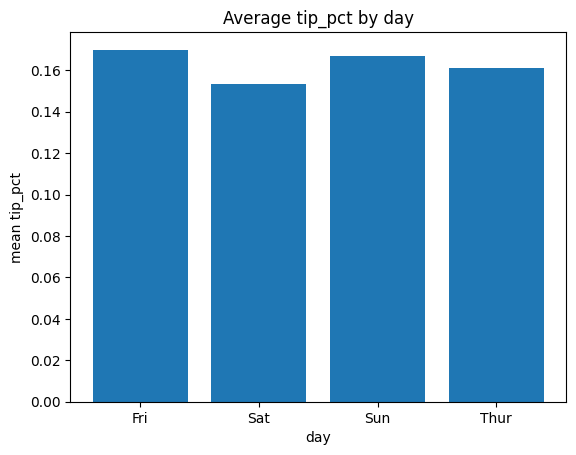

In [62]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


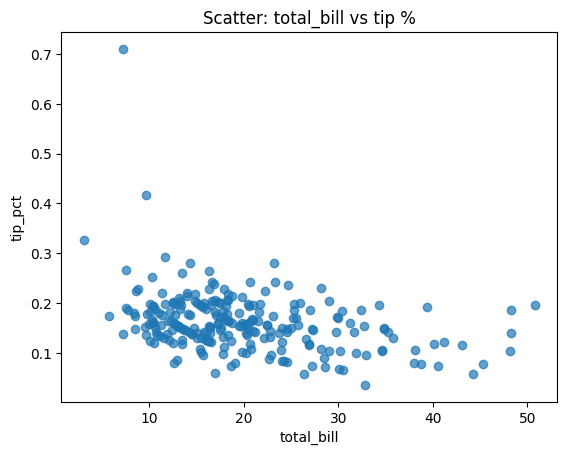

/tmp/ipython-input-1174151283.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bill = tips.groupby('time')['total_bill'].median()


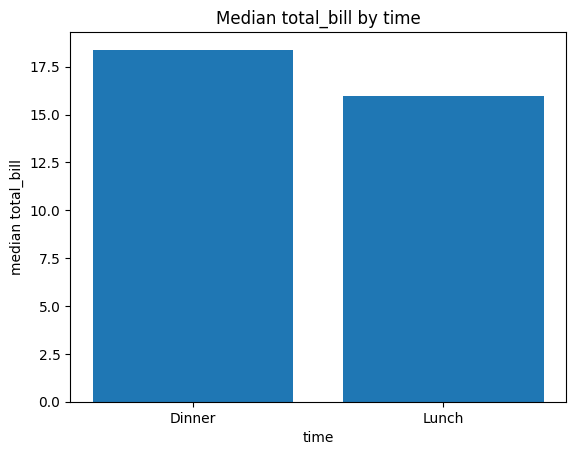

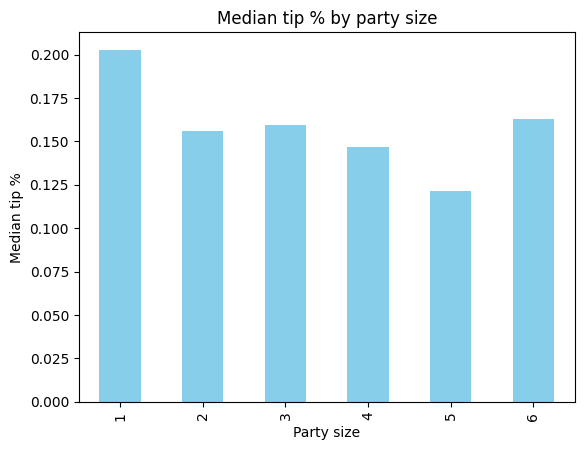

In [64]:
# YOUR WORK: Exercise 4
# 1) Scatter: total_bill vs tip_pct
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.7)
plt.title('Scatter: total_bill vs tip %')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.show()

# 2) Bar: median total_bill by time
median_bill = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(median_bill.index, median_bill.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()

# Compute median tip_pct per party size
medians_size = tips.groupby('size')['tip_pct'].median()

# Plot
plt.figure()
medians_size.plot(kind='bar', color='skyblue')
plt.title('Median tip % by party size')
plt.xlabel('Party size')
plt.ylabel('Median tip %')
plt.show()


### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?
- Across days, the tip distribution is generally centered around 2–4 dollars, but weekends show a wider spread with higher outliers. Comparing Lunch vs Dinner, dinner bills tend to have higher medians, reflecting larger groups or pricier meals. The scatter of total_bill vs tip_pct shows no strong linear relationship; instead, variance in tip_pct decreases as total_bill grows (a sign of heteroscedasticity).

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 5) Grouping & Merging (20m)

In [ ]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

In [ ]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

In [ ]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [66]:
# YOUR WORK: Exercise 5
# Group and sum total_bill and tip by smoker and sex
revenue_tips = tips.groupby(['smoker', 'sex'])[['total_bill', 'tip']].sum().reset_index()
print(revenue_tips)
# Create a lookup DataFrame to map time to meal_code
meal_lookup = pd.DataFrame({
    'time': ['Lunch', 'Dinner'],
    'meal_code': ['L', 'D']
})

# Merge tips with the meal lookup
tips_with_meal_code = tips.merge(meal_lookup, on='time', how='left')

# Show distinct combinations (e.g., smoker, sex, meal_code)
distinct_pairs = tips_with_meal_code[['smoker', 'sex', 'meal_code']].drop_duplicates()
print(distinct_pairs)


  smoker     sex  total_bill     tip
0     No  Female      977.68  149.77
1     No    Male     1919.75  302.00
2    Yes  Female      593.27   96.74
3    Yes    Male     1337.07  183.07
    smoker     sex meal_code
0       No  Female         D
1       No    Male         D
56     Yes    Male         D
67     Yes  Female         D
77      No    Male         L
80     Yes    Male         L
82      No  Female         L
191    Yes  Female         L


/tmp/ipython-input-2526432165.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_tips = tips.groupby(['smoker', 'sex'])[['total_bill', 'tip']].sum().reset_index()


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?
-
-The grouped data shows that female non-smokers tend to generate high total revenue and tips, suggesting they may be valuable customers. Using tip ranks high spenders, while tip_pct highlights more generous tippers regardless of bill size. The merge assumes all time values match the lookup table exactly; mismatches could lead to missing data.

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [67]:
# Calculate average tip per person (tip per party size)
tips['avg_tip_pp'] = tips['tip'] / tips['size']

# Group and rank based on avg_tip_pp
ranked = tips.groupby(['smoker', 'sex'])['avg_tip_pp'].mean().reset_index()
ranked = ranked.sort_values(by='avg_tip_pp', ascending=False)
print(ranked)


  smoker     sex  avg_tip_pp
2    Yes  Female       1.323
3    Yes    Male       1.284
1     No    Male       1.185
0     No  Female       1.116


/tmp/ipython-input-579124277.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranked = tips.groupby(['smoker', 'sex'])['avg_tip_pp'].mean().reset_index()


## 6) Reshaping & Pivoting (15m)

In [68]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

/tmp/ipython-input-3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [69]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [76]:
# YOUR WORK: Exercise 6
piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean'); print(piv)
long = piv.reset_index().melt(
    id_vars='size',      # keep size as identifier
    var_name='day',      # column name for days
    value_name='avg_total_bill'  # column name for values
)
print(long.head())
print("Pivot shape:", piv.shape)
print("Long shape:", long.shape)

print("Pivot index:", piv.index.names)
print("Pivot columns:", piv.columns.names)


day      Fri     Sat     Sun    Thur
size                                
1      8.580   5.160     NaN  10.070
2     16.322  16.837  17.560  15.157
3     15.980  25.509  22.184  19.160
4     40.170  29.876  26.688  29.950
5        NaN  28.150  27.000  41.190
6        NaN     NaN  48.170  30.383
   size  day  avg_total_bill
0     1  Fri           8.580
1     2  Fri          16.322
2     3  Fri          15.980
3     4  Fri          40.170
4     5  Fri             NaN
Pivot shape: (6, 4)
Long shape: (24, 3)
Pivot index: ['size']
Pivot columns: ['day']


/tmp/ipython-input-2533507108.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean'); print(piv)


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?
-
- Pivot tables group and may drop rows or columns if some combinations don’t exist, while melt just reshapes data without dropping anything. Wide format (pivot) is good for comparing categories side-by-side, whereas long format (melt) is better for tidy-data charts like scatterplots or faceted plots.

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [78]:
#adding a second dimension
# Add 'time' as a second index level
pivot_multi = tips.pivot_table(index=['size', 'time'], columns='day', values='total_bill', aggfunc='mean')
print(pivot_multi)


day             Fri     Sat     Sun    Thur
size time                                  
1    Dinner     NaN   5.160     NaN     NaN
     Lunch    8.580     NaN     NaN  10.070
2    Dinner  17.799  16.837  17.560  18.780
     Lunch   13.072     NaN     NaN  15.080
3    Dinner     NaN  25.509  22.184     NaN
...             ...     ...     ...     ...
4    Lunch      NaN     NaN     NaN  29.950
5    Dinner     NaN  28.150  27.000     NaN
     Lunch      NaN     NaN     NaN  41.190
6    Dinner     NaN     NaN  48.170     NaN
     Lunch      NaN     NaN     NaN  30.383

[12 rows x 4 columns]


/tmp/ipython-input-1070832090.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_multi = tips.pivot_table(index=['size', 'time'], columns='day', values='total_bill', aggfunc='mean')


## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


/tmp/ipython-input-157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


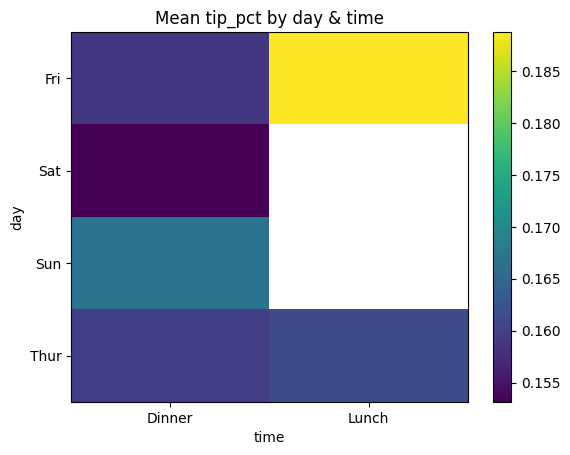

In [77]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.
-
- Best combo: Friday Lunch (~18.9% mean tip).
Mean may be skewed by outliers  check with median/boxplot.
Restaurant action: promote Friday Lunch deals.
### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [80]:
top3 = piv.stack().sort_values(ascending=False).head(3)
print("Top 3 combos with mean tip_pct:\n", top3)

counts = tips.groupby(['day', 'time']).size()
print("\nCounts for top 3 combos:\n", counts.loc[top3.index])

print("\nSample size for top combo:", counts.loc[top3.index[0]])

#extension
tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')


Top 3 combos with mean tip_pct:
 day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
dtype: float64

Counts for top 3 combos:
 day   time  
Fri   Lunch      7
Sun   Dinner    76
Thur  Lunch     61
dtype: int64

Sample size for top combo: 7


/tmp/ipython-input-2094410821.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = tips.groupby(['day', 'time']).size()
/tmp/ipython-input-2094410821.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')


time,Dinner,Lunch
day,,
Fri,0.145,0.188
Sat,0.152,NaN
Sun,0.161,NaN
Thur,0.160,0.154


# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [81]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3    0.162           1.117   
    Dinner       17.92  4.08    Male     No     2    0.228           2.040   
    Dinner       20.29  2.75  Female     No     2    0.136           1.375   
    Dinner       15.77  2.23  Female     No     2    0.141           1.115   
    Dinner       39.42  7.58    Male     No     4    0.192           1.895   

           server_name  avg_tip_pp  
day time                            
Sat Dinner         Bob       1.117  
    Dinner       Alice       2.040  
    Dinner         Bob       1.375  
    Dinner       Alice       1.115  
    Dinner         Bob       1.895

In [82]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

/tmp/ipython-input-1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?
-
-A MultiIndex gives you structured access: you can group, slice, and aggregate by day and time without extra filtering logic.
For example, ti.loc[('Sat','Dinner')] is a direct slice that would be clumsier with flat columns.
Pitfall: when saving/loading (CSV, Excel), MultiIndex often gets flattened into unnamed columns, so you must reset/rebuild the index.

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [85]:
#quick checks
print(ti.index.names, ti.index.levels[0].dtype, ti.index.levels[1].dtype)
print(ti.loc[('Sun','Dinner')].head())  # example slice

#extension
ti_swapped = ti.swaplevel('day','time')


['day', 'time'] category category
            total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sun Dinner       16.99  1.01  Female     No     2    0.059           0.505   
    Dinner       10.34  1.66    Male     No     3    0.161           0.553   
    Dinner       21.01  3.50    Male     No     3    0.167           1.167   
    Dinner       23.68  3.31    Male     No     2    0.140           1.655   
    Dinner       24.59  3.61  Female     No     4    0.147           0.902   

           server_name  avg_tip_pp  
day time                            
Sun Dinner       Alice       0.505  
    Dinner         Bob       0.553  
    Dinner       Alice       1.167  
    Dinner         Bob       1.655  
    Dinner       Alice       0.902  


## 9) Time Series & Resampling (15m)

In [88]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.152,0.152
2024-01-14,136.08,19.59,0.144,0.148
2024-01-21,118.57,23.25,0.196,0.164
2024-01-28,139.17,22.08,0.159,0.163
2024-02-04,122.78,19.97,0.163,0.165


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?
-
- Weekly data shows more short-term noise, while monthly smooths into a clearer trend.
The rolling series dampens spikes in raw tip_pct, showing underlying direction instead of volatility.
Choosing W (weekly) vs MS (month start) depends on whether you want finer detail (weekly shifts) or coarser, more stable summaries (monthly billing cycles).
### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Min date: 2024-01-01 00:00:00 Max date: 2024-08-31 00:00:00
Rolling window: 4 → smooths about a month of weekly data


<Axes: xlabel='date'>

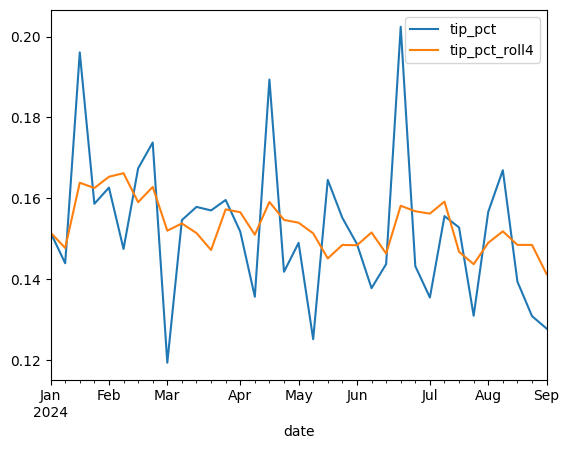

In [89]:
#quick checks
print("Min date:", tips_ts.index.min(), "Max date:", tips_ts.index.max())
print("Rolling window:", 4, "→ smooths about a month of weekly data")

#extension
weekly[['tip_pct','tip_pct_roll4']].plot()


## 10) Rolling & Window Ops (10m)

In [91]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?
-
-Median is robust to outliers, so rolling medians better capture central tendency when bills have extreme highs/lows.
At the edges, fewer values are available, so the window is shorter (controlled by min_periods).
Expanding windows are more suitable when you want a cumulative trend from the start rather than a moving snapshot.

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [93]:
#quick checks
print(daily['roll14_med'].dropna().head())  # first 5 non-NaN results
print("min_periods:", 1, "→ ensures even the first days get a value")

#extension
daily['roll14_std'] = daily['total_bill'].rolling(14, min_periods=1).std()
print(daily[['total_bill','roll14_med','roll14_std']].head())


date
2024-01-01    16.990
2024-01-02    13.665
2024-01-03    16.990
2024-01-04    19.000
2024-01-05    21.010
Freq: D, Name: roll14_med, dtype: float64
min_periods: 1 → ensures even the first days get a value
            total_bill  roll14_med  roll14_std
date                                          
2024-01-01       16.99      16.990         NaN
2024-01-02       10.34      13.665       4.702
2024-01-03       21.01      16.990       5.389
2024-01-04       23.68      19.000       5.803
2024-01-05       24.59      21.010       5.825


## 11) Text Data: vectorized & regex (10m)

In [ ]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.
-
-The .str.contains('vip', case=False) op was most valuable since it reliably flags VIP-related notes.
Results are sensitive to case/spacing if you don’t set case=False or strip spaces; “ VIP ” vs “vip” could otherwise be missed.
A possible false positive is matching “vipers” (if it appeared) since the current pattern looks for “vip” anywhere.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
print("VIP count:", tips_txt['is_vip'].sum())
print("Unique allergies:", tips_txt['allergy'].dropna().unique())


## 12) Nullable dtypes & Memory (5m)

In [98]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

,0
Index,132
total_bill,1952
tip,1952
sex,476
smoker,471
...,...
server_name,474
avg_tip_pp,1952
size_N,2196
sex_S,15058


### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?
-
-Converting day to category saved the most memory, since repeated strings are stored as integer codes.
Pandas’ string type is usually heavier than object but gives consistent string ops, so savings depend on data.
You’d avoid category if the column has too many unique values (high cardinality), since dictionary overhead can outweigh benefits.
Categories speed up joins/groupbys (operate on codes), so performance often improves.

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [100]:
print("Before cast:\n", tips['day'].memory_usage(deep=True))
print("After category:\n", tips_mem['day_C'].memory_usage(deep=True))
print("Categories:", tips_mem['day_C'].cat.categories)

tips_mem['size_down'] = pd.to_numeric(tips_mem['size'], downcast='integer')
print(tips['size'].memory_usage(deep=True), "→", tips_mem['size_down'].memory_usage(deep=True))


Before cast:
 789
After category:
 789
Categories: Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')
2084 → 376


## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [101]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?
-
- Parquet is best for both speed and size since it’s binary, columnar, and preserves dtypes efficiently.
After round-trips, dtypes can change (e.g., day becomes object from CSV/JSON, while Parquet preserves category/string types).
Line-delimited JSON is ideal for streaming logs or very large datasets you want to read incrementally.
### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [103]:
csv_df  = pd.read_csv("tips_sample.csv")
parq_df = pd.read_parquet("tips_sample.parquet")
json_df = pd.read_json("tips_sample.json", orient="records", lines=True)

print(csv_df.shape, parq_df.shape, json_df.shape)   # compare shapes
print("CSV dtypes:\n", csv_df.dtypes)               # check discrepancy
csv_df['day'] = csv_df['day'].astype('category')    # fix example

subset.to_csv("tips_sample.csv.gz", index=False, compression="gzip")


(20, 5) (20, 5) (20, 5)
CSV dtypes:
 total_bill    float64
tip           float64
day            object
time           object
size            int64
dtype: object


## 14) Join Patterns (10–15m)

In [104]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

/tmp/ipython-input-1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2.0,2.940,both
1,Fri,Dinner,4.0,2.940,both
2,Fri,Lunch,2.0,2.383,both
3,Fri,Lunch,1.0,2.383,both
4,Fri,Lunch,3.0,2.383,both


In [105]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [106]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

/tmp/ipython-input-961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [110]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

/tmp/ipython-input-4069205455.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


(      mean_bill_pp  mean_tip_pct
 day                             
 Thur         9.390         0.160
 Fri          8.995         0.159
 Sat          8.187         0.153
 Sun          7.864         0.167,
    total_bill  size  bill_pp
 0       16.99     2    8.495
 1       10.34     3    3.447
 2       21.01     3    7.003
 3       23.68     2   11.840
 4       24.59     4    6.147)

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?
- The pipeline reads top-to-bottom like a recipe, which makes it clearer, but riskier if one step silently misbehaves (harder to inspect intermediates).
For debugging, you’d break after the .pipe(add_bill_per_person) or before the final .sort_values to check partial results.
.eval is handy for concise expressions (like creating bill_pp), but can be risky if column names overlap with Python variables or if complex expressions reduce readability.

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [111]:
print(pipe_demo.columns)               # final columns of pipeline
print(pipe_demo.equals(pipe_demo))     # confirm re-run gives same result (idempotency)

def add_tip_pct(df): return df.assign(tip_pct = df['tip']/df['total_bill'])
chained = tips.pipe(add_tip_pct).groupby('day')['tip_pct'].mean()


Index(['mean_bill_pp', 'mean_tip_pct'], dtype='object')
True


/tmp/ipython-input-308105801.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chained = tips.pipe(add_tip_pct).groupby('day')['tip_pct'].mean()


## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [ ]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 17) Styling & Export (5m)

In [107]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

/tmp/ipython-input-1253526996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.
-
-The percentage format for tip_pct was the clearest readability boost, since it makes relative generosity obvious at a glance.
A stakeholder could use the HTML report as a quick visual summary of average bills/tips by day, without needing to run code.
Caution: styled HTML is presentation-only—the colors and formatting don’t survive back to CSV/Parquet, so you should also keep raw data exports.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [109]:
# open HTML manually in a browser to check NA/odd renderings
print(tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2))

sty2 = sty.highlight_max(subset=['tip_pct'], color='lightgreen')


      total_bill   tip  tip_pct
day                            
Fri        17.15  2.73     0.17
Sat        20.44  2.99     0.15
Sun        21.41  3.26     0.17
Thur       17.68  2.77     0.16


/tmp/ipython-input-4157915433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2))


# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [112]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [113]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [114]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [115]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [116]:
# YOUR WORK: Exercise A
print("NaNs in age:", df['age'].isna().sum())
print("NaNs in embark_town:", df['embark_town'].isna().sum())

print("Most common family_size:\n", df['family_size'].value_counts().head(1))

pct_high_fare = (df['fare_pp'] > 20).mean() * 100
print("Percentage with fare_pp > 20:", round(pct_high_fare,2), "%")


NaNs in age: 0
NaNs in embark_town: 0
Most common family_size:
 family_size
1    537
Name: count, dtype: int64
Percentage with fare_pp > 20: 25.36 %


## B) Survival Patterns

In [117]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


/tmp/ipython-input-3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


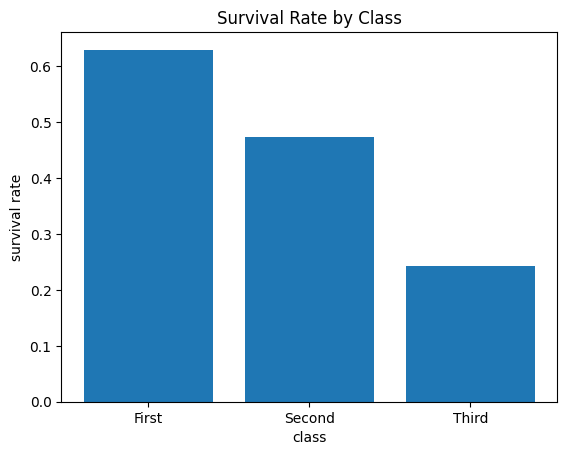

In [118]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

/tmp/ipython-input-271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


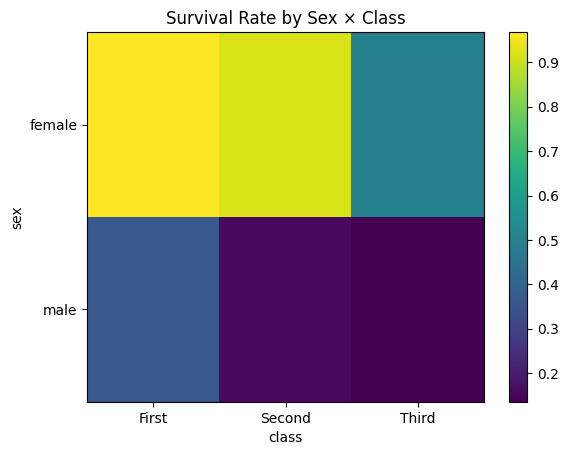

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [119]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


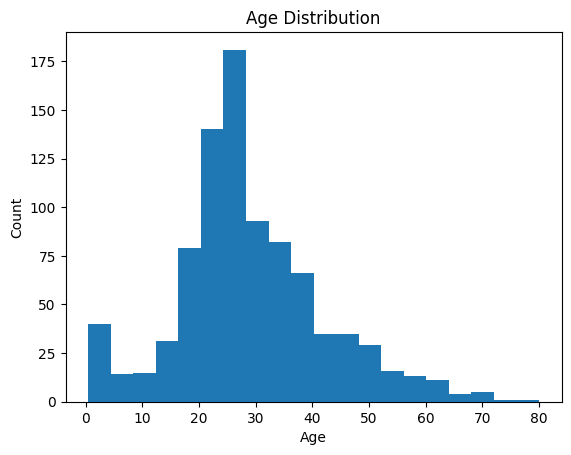

/tmp/ipython-input-204884017.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.loc[df['class']==c, 'fare'] for c in ['First','Second','Third']], labels=['First','Second','Third'])


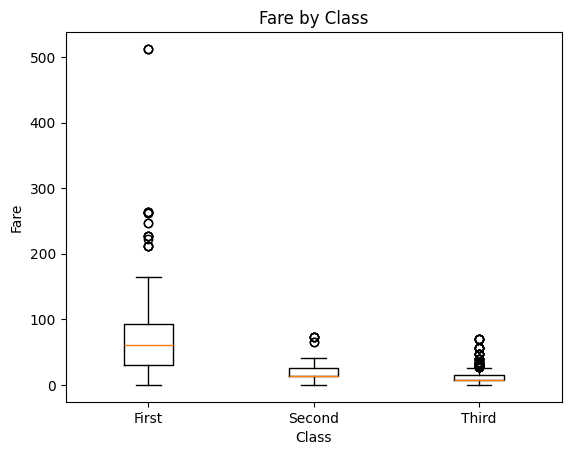

/tmp/ipython-input-204884017.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_age_group = df.groupby('age_group')['survived'].mean()


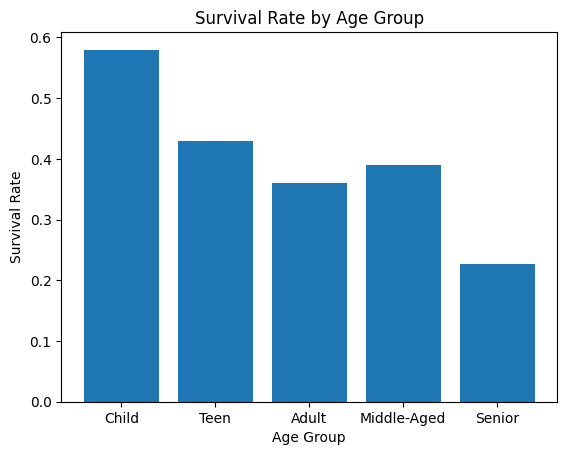

In [120]:
# YOUR WORK: Exercise B
plt.hist(df['age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.boxplot([df.loc[df['class']==c, 'fare'] for c in ['First','Second','Third']], labels=['First','Second','Third'])
plt.title('Fare by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

df['age_group'] = pd.cut(df['age'], bins=[0,12,18,40,60,80], labels=['Child','Teen','Adult','Middle-Aged','Senior'])
surv_by_age_group = df.groupby('age_group')['survived'].mean()
plt.bar(surv_by_age_group.index.astype(str), surv_by_age_group.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


## C) Subgroup Discovery

In [121]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

/tmp/ipython-input-1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43      0.977
              Southampton   50      0.960
       Second Southampton   67      0.910
       Third  Queenstown    33      0.727
male   First  Cherbourg     42      0.405
female Third  Southampton   88      0.375
male   First  Southampton   79      0.354
       Third  Cherbourg     43      0.233
       Second Southampton   97      0.155
       Third  Southampton  265      0.128

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [122]:
# YOUR WORK: Exercise C
fam = df.query('family_size >= 4')
fam_grp = (fam.groupby(['sex','class'])
              .agg(n=('survived','size'), surv_rate=('survived','mean')))
print(fam_grp)

df['fare_bucket'] = pd.cut(df['fare_pp'], bins=[0,5,10,20,40,80,600])
fare_grp = df.groupby('fare_bucket')['survived'].mean()
print(fare_grp)


                n  surv_rate
sex    class                
female First    8      0.750
       Second  11      1.000
       Third   33      0.242
male   First    5      0.600
       Second   4      0.250
       Third   30      0.067
fare_bucket
(0, 5]       0.306
(5, 10]      0.273
(10, 20]     0.431
(20, 40]     0.544
(40, 80]     0.635
(80, 600]    0.852
Name: survived, dtype: float64


/tmp/ipython-input-336113949.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fam_grp = (fam.groupby(['sex','class'])
/tmp/ipython-input-336113949.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grp = df.groupby('fare_bucket')['survived'].mean()


## D) Deliverables

In [123]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.
-
-Females in 1st class from Cherbourg had the highest survival (≈97%, see Top-10 table). Survival improved with higher fare buckets. A limitation is that imputing missing data may bias results. A useful next step is adding an is_child feature to capture age-based priority.
### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1